# LOL胜利因素分析
by Romi

**数据字典**

项目    | Value
-------- | -----
teamid  | 比赛ID
win  | 是否胜利
firstBlood  | 是否取得一血
firstTower  | 是否取得一塔
firstInhibitor  | 是否率先推掉水晶
firstBaron  | 是否拿到第一条大龙
firstDragon  | 是否拿到第一条小龙
firstRiftHerald  | 是否拿到第一条峡谷先锋
towerKills  | 推塔数	
inhibitorKills  | 摧毁水晶数
baronKills  | 击杀大龙数
dragonKills  | 击杀小龙数
riftHeraldKills  | 击杀峡谷先锋数
region  | 地区

# EDA部分

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print ('success')

success


In [62]:
match_df=pd.read_csv(r"matches.csv")#读取数据文件
match_df

,teamid,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills,region
0,0,0,0,0,0,0,0,0,0,0,0,0,0,na1
1,1,1,1,1,0,0,1,0,1,0,0,2,0,na1
2,2,0,0,0,0,0,0,0,0,0,0,0,0,na1
3,3,1,1,1,1,0,1,1,8,1,0,2,1,na1
4,4,1,1,1,1,0,1,0,10,2,0,1,0,na1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9221,9221,0,0,0,0,0,0,0,0,0,0,0,0,eun1
9222,9222,0,0,1,0,0,0,0,2,0,0,1,0,eun1
9223,9223,1,1,0,1,1,1,1,7,1,1,3,1,eun1
9224,9224,1,1,1,1,1,1,0,9,1,2,4,0,eun1


In [4]:
match_df.describe()

,teamid,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills
count,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.00000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000,9226.000000
mean,4612.500000,0.500000,0.499566,0.496206,0.388142,0.27726,0.439627,0.439302,4.611207,0.684587,0.363971,1.554195,0.700087
std,2663.461125,0.500027,0.500027,0.500013,0.487354,0.44767,0.496369,0.496329,3.413101,0.957761,0.583586,1.340606,0.738059
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2306.250000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,4612.500000,0.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,1.000000
75%,6918.750000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,8.000000,1.000000,1.000000,3.000000,1.000000
max,9225.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,11.000000,7.000000,3.000000,5.000000,2.000000


In [5]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9226 entries, 0 to 9225
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   teamid           9226 non-null   int64 
 1   win              9226 non-null   int64 
 2   firstBlood       9226 non-null   int64 
 3   firstTower       9226 non-null   int64 
 4   firstInhibitor   9226 non-null   int64 
 5   firstBaron       9226 non-null   int64 
 6   firstDragon      9226 non-null   int64 
 7   firstRiftHerald  9226 non-null   int64 
 8   towerKills       9226 non-null   int64 
 9   inhibitorKills   9226 non-null   int64 
 10  baronKills       9226 non-null   int64 
 11  dragonKills      9226 non-null   int64 
 12  riftHeraldKills  9226 non-null   int64 
 13  region           9226 non-null   object
dtypes: int64(13), object(1)
memory usage: 1009.2+ KB


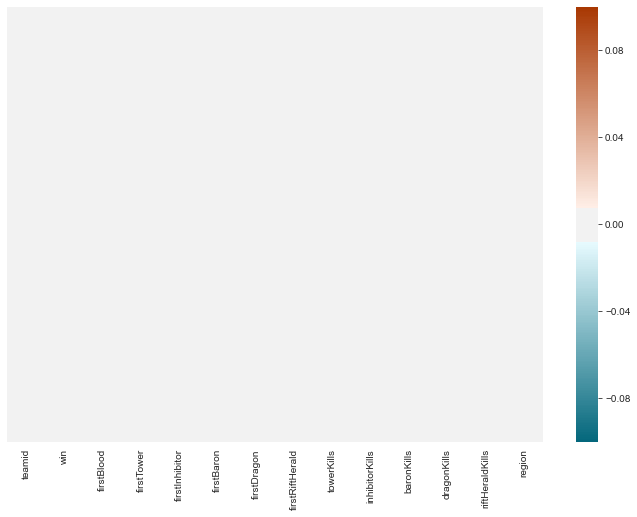

In [13]:
sns.set_style('darkgrid') #设置表风格，可选项包括{darkgrid, whitegrid, dark, white, ticks}
plt.figure(figsize = (12,8)) #创建一个figure图形实例
cmap = sns.diverging_palette(220, 20, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) #设置图像的colormap

sns.heatmap(match_df.isna(), cmap = cmap, yticklabels = False) #利用df.isna()来获取是否存在nan并用热力图可视化

In [34]:
#计算各个资源的获取对于游戏胜利的影响
(match_df.groupby(['win']).sum().iloc[1]/(match_df.groupby(['win']).sum().iloc[1]+match_df.groupby(['win']).sum().iloc[0]))[:5]

teamid            0.500001
firstBlood        0.588848
firstTower        0.702490
firstInhibitor    0.913432
firstBaron        0.802189
dtype: float64

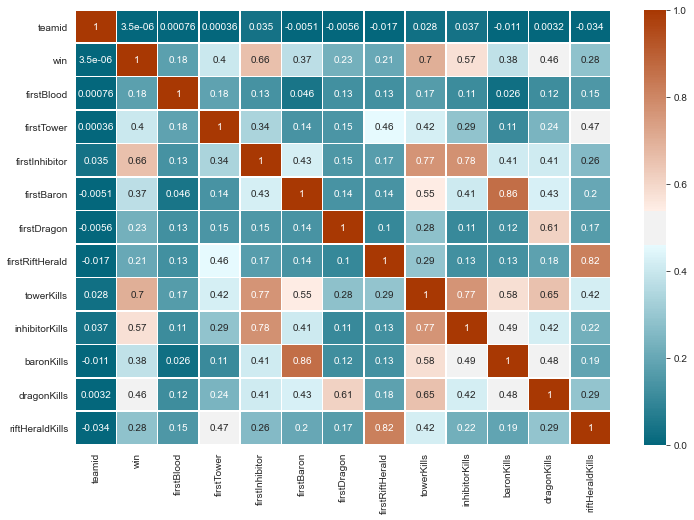

In [38]:
#设定图像样式
plt.figure(figsize = (12,8))
cmap = sns.diverging_palette(220, 20, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 

#drop函数默认删除行，列需要加axis = 1
#查看各个变量之间的相关系数
sns.heatmap(match_df.drop(['region'], axis = 1).corr(), vmin = 0, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')

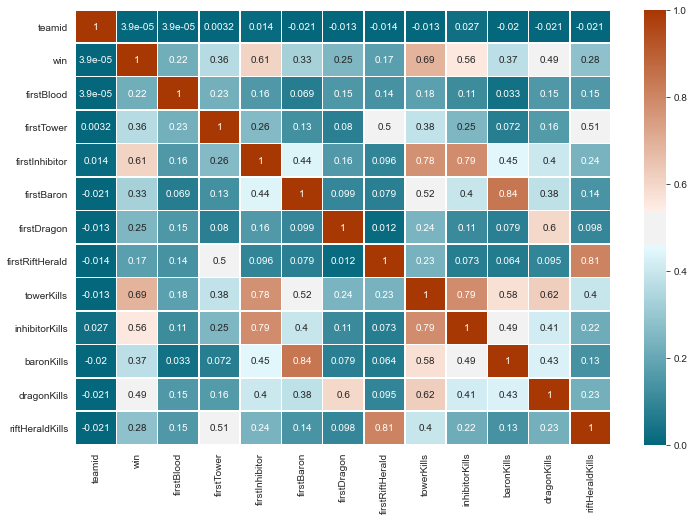

In [51]:
#同时我们也可以查看各地区的相关系数
plt.figure(figsize = (12,8))
sns.heatmap(match_df[match_df.region == 'kr'].drop(['region'], axis = 1).corr(), vmin = 0, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')

# PCA部分

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
print('success')

success


In [40]:
#数据标准化 / 归一化
scaler = StandardScaler()
scaler.fit(match_df.drop(['win', 'region'], axis = 1))
scaled_data = scaler.transform(match_df.drop(['win', 'region'], axis=1))
scaled_data

array([[-1.73186308, -0.99913326, -0.99244131, ..., -0.62371444,
        -1.15938506, -0.94860297],
       [-1.73148761,  1.00086749,  1.00761626, ..., -0.62371444,
         0.33255811, -0.94860297],
       [-1.73111214, -0.99913326, -0.99244131, ..., -0.62371444,
        -1.15938506, -0.94860297],
       ...,
       [ 1.73111214,  1.00086749, -0.99244131, ...,  1.08992148,
         1.0785297 ,  0.40637628],
       [ 1.73148761,  1.00086749,  1.00761626, ...,  2.8035574 ,
         1.82450128, -0.94860297],
       [ 1.73186308, -0.99913326, -0.99244131, ..., -0.62371444,
        -0.41341347,  0.40637628]])

In [41]:
exp_var_ratio = []
for n in range(0,8):
    pca = PCA(n_components = n)
    pca.fit(scaled_data)
    pca.transform(scaled_data)
    exp_var_ratio.append(sum(pca.explained_variance_ratio_))

exp_var_ratio

[0,
 0.3711325291931778,
 0.522282727624492,
 0.6249863766909857,
 0.7169140092860153,
 0.7983414196662135,
 0.8718622589889551,
 0.9191467963276541]

Text(0, 0.5, 'Ratio of Variance Explained')

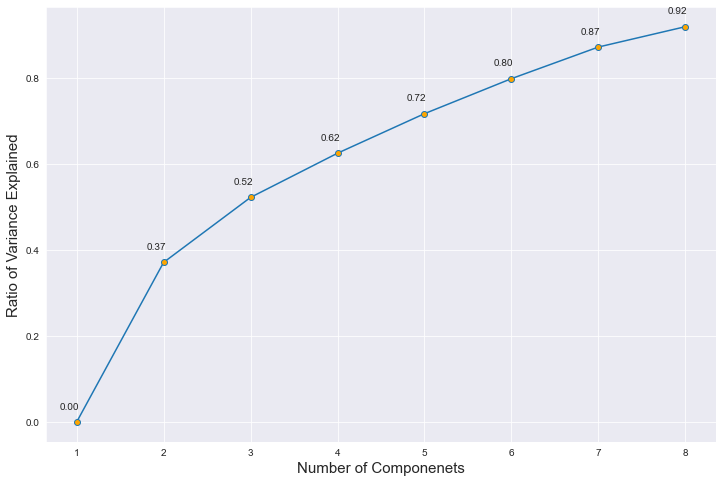

In [45]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)#添加一个画布用于绘图，“111”表示“1×1网格，第一子图”
plt.plot(range(1,9), exp_var_ratio, marker = 'o', markerfacecolor = 'orange', markersize = 6)#绘制散点图
#利用zip返回一个可迭代的对象
for i,j in zip(range(1,9),exp_var_ratio):
    ax.annotate('{:.2f}'.format(j),xy=(i-.2,j+.03))#标注图中的数据
plt.xlabel('Number of Componenets', size = 15)
plt.ylabel('Ratio of Variance Explained', size = 15)

从上述PCA分析中我们可以看到，在六个变量的情况下可解释度来到了80%。这样我们可以可以选择6个对应特征来进行后续分析

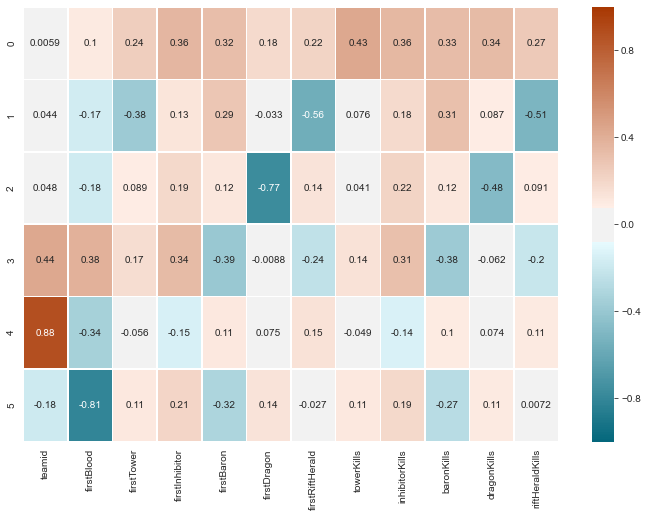

In [48]:
#将PCA特征的个数选定在6个
pca = PCA(n_components = 6)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)

pca_corr = pd.DataFrame(pca.components_, columns = match_df.drop(['win', 'region'], axis = 1).columns)

plt.figure(figsize = (12,8))
sns.heatmap(pca_corr, cmap = cmap, vmin = -1, vmax = 1, annot = True, lw = .5, linecolor = 'white')

# 逻辑回归部分（Logistic Regression）

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
X = match_df.drop(['win', 'region'], axis = 1)
y = match_df.win

#使用train_test_split将数据集分为训练街和测试集
#train_data：所要划分的样本特征集  train_target：所要划分的样本结果  test_size：样本占比，如果是整数的话就是样本的数量
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)#predict方法返回分类结果的预测，注意和predict_proba方法区分并灵活使用

#输出分类报告
#其中列表左边的一列为分类的标签名，右边support列为每个标签的出现次数．avg / total行为各列的均值（support列为总和）． 
#precision recall f1-score三列分别为各个类别的精确度,召回率及 F1值．
print(classification_report(y_test, y_pred))

#输出混淆矩阵
print(confusion_matrix(y_test, y_pred))

#对于输出后的模型，输出coef_（模型系数）.intercept_为截距
log_coeff_tot = pd.Series(log.coef_[0], index = match_df.drop(['win', 'region'], axis = 1).columns)
print(log_coeff_tot)
print(log.coef_)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1378
           1       0.86      0.82      0.84      1390

    accuracy                           0.84      2768
   macro avg       0.84      0.84      0.84      2768
weighted avg       0.84      0.84      0.84      2768

[[1196  182]
 [ 250 1140]]
teamid            -0.000047
firstBlood         0.329629
firstTower         0.992346
firstInhibitor     1.420742
firstBaron         0.307205
firstDragon        0.319962
firstRiftHerald    0.154452
towerKills         0.444066
inhibitorKills     0.201186
baronKills        -0.321922
dragonKills        0.117487
riftHeraldKills   -0.299392
dtype: float64
[[-4.66948302e-05  3.29629088e-01  9.92345914e-01  1.42074194e+00
   3.07205358e-01  3.19962398e-01  1.54452330e-01  4.44066039e-01
   2.01185852e-01 -3.21922255e-01  1.17486891e-01 -2.99392267e-01]]


C:\Users\kevin.shu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
#na地区的分析
X = match_df[match_df.region == 'na1'].drop(['win', 'region'], axis = 1)
y = match_df[match_df.region == 'na1'].win

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

log_coeff_na = pd.Series(log.coef_[0], index = match_df.drop(['win', 'region'], axis = 1).columns)
print(log_coeff_na)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       290
           1       0.89      0.86      0.88       292

    accuracy                           0.88       582
   macro avg       0.88      0.88      0.88       582
weighted avg       0.88      0.88      0.88       582

[[258  32]
 [ 40 252]]

teamid            -0.000100
firstBlood         0.433178
firstTower         1.181903
firstInhibitor     1.845858
firstBaron         0.382661
firstDragon        0.766360
firstRiftHerald   -0.380723
towerKills         0.401993
inhibitorKills     0.446877
baronKills        -0.583104
dragonKills        0.241382
riftHeraldKills   -0.049353
dtype: float64


C:\Users\kevin.shu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
#br地区分析
X = match_df[match_df.region == 'br1'].drop(['win', 'region'], axis = 1)
y = match_df[match_df.region == 'br1'].win

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

log_coeff_br = pd.Series(log.coef_[0], index = match_df.drop(['win', 'region'], axis = 1).columns)
print(log_coeff_br)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       282
           1       0.89      0.81      0.85       273

    accuracy                           0.86       555
   macro avg       0.86      0.86      0.86       555
weighted avg       0.86      0.86      0.86       555

[[256  26]
 [ 52 221]]

teamid            -0.000196
firstBlood         0.354763
firstTower         0.946800
firstInhibitor     1.309581
firstBaron        -0.005511
firstDragon        0.131344
firstRiftHerald    0.278184
towerKills         0.396123
inhibitorKills     0.196535
baronKills         0.059879
dragonKills       -0.009220
riftHeraldKills   -0.446592
dtype: float64


C:\Users\kevin.shu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
#kr地区分析
X = match_df[match_df.region == 'kr'].drop(['win', 'region'], axis = 1)
y = match_df[match_df.region == 'kr'].win

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

log_coeff_kr = pd.Series(log.coef_[0], index = match_df.drop(['win', 'region'], axis = 1).columns)
print(log_coeff_kr)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       295
           1       0.87      0.81      0.83       304

    accuracy                           0.84       599
   macro avg       0.84      0.84      0.84       599
weighted avg       0.84      0.84      0.84       599

[[257  38]
 [ 59 245]]

teamid            -0.000150
firstBlood         0.578076
firstTower         1.005407
firstInhibitor     1.148042
firstBaron        -0.548263
firstDragon        0.398793
firstRiftHerald    0.001647
towerKills         0.428227
inhibitorKills     0.289125
baronKills         0.114167
dragonKills        0.307734
riftHeraldKills   -0.101238
dtype: float64


C:\Users\kevin.shu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [58]:
#euw地区分析
X = match_df[match_df.region == 'euw1'].drop(['win', 'region'], axis = 1)
y = match_df[match_df.region == 'euw1'].win

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

log_coeff_euw = pd.Series(log.coef_[0], index = match_df.drop(['win', 'region'], axis = 1).columns)
print(log_coeff_euw)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       247
           1       0.91      0.82      0.86       255

    accuracy                           0.87       502
   macro avg       0.87      0.87      0.87       502
weighted avg       0.87      0.87      0.87       502

[[225  22]
 [ 45 210]]

teamid            -0.000313
firstBlood         0.602532
firstTower         0.819708
firstInhibitor     1.836300
firstBaron         1.535426
firstDragon       -0.027572
firstRiftHerald    0.074653
towerKills         0.517561
inhibitorKills    -0.104589
baronKills        -1.071530
dragonKills       -0.073740
riftHeraldKills   -0.339856
dtype: float64


C:\Users\kevin.shu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [59]:
#eun地区分析
X = match_df[match_df.region == 'eun1'].drop(['win', 'region'], axis = 1)
y = match_df[match_df.region == 'eun1'].win

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

log_coeff_eun = pd.Series(log.coef_[0], index = match_df.drop(['win', 'region'], axis = 1).columns)
print(log_coeff_eun)

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       258
           1       0.87      0.85      0.86       274

    accuracy                           0.86       532
   macro avg       0.86      0.86      0.86       532
weighted avg       0.86      0.86      0.86       532

[[223  35]
 [ 40 234]]

teamid            -0.000304
firstBlood         0.289056
firstTower         0.392115
firstInhibitor     1.447893
firstBaron        -0.068350
firstDragon        0.361023
firstRiftHerald   -0.530574
towerKills         0.536544
inhibitorKills    -0.001033
baronKills         0.175543
dragonKills       -0.084841
riftHeraldKills    0.050210
dtype: float64


C:\Users\kevin.shu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [60]:
#各地区的权重差异
win_conditions_dict = dict()
win_conditions_dict['overall'] = log_coeff_tot
win_conditions_dict['na'] = log_coeff_na
win_conditions_dict['br'] = log_coeff_br
win_conditions_dict['kr'] = log_coeff_kr
win_conditions_dict['euw'] = log_coeff_euw
win_conditions_dict['eun'] = log_coeff_eun
win_conditions = pd.DataFrame(win_conditions_dict)
win_conditions

,overall,na,br,kr,euw,eun
teamid,-0.000047,-0.000100,-0.000196,-0.000150,-0.000313,-0.000304
firstBlood,0.329629,0.433178,0.354763,0.578076,0.602532,0.289056
firstTower,0.992346,1.181903,0.946800,1.005407,0.819708,0.392115
firstInhibitor,1.420742,1.845858,1.309581,1.148042,1.836300,1.447893
firstBaron,0.307205,0.382661,-0.005511,-0.548263,1.535426,-0.068350
firstDragon,0.319962,0.766360,0.131344,0.398793,-0.027572,0.361023
firstRiftHerald,0.154452,-0.380723,0.278184,0.001647,0.074653,-0.530574
towerKills,0.444066,0.401993,0.396123,0.428227,0.517561,0.536544
inhibitorKills,0.201186,0.446877,0.196535,0.289125,-0.104589,-0.001033
baronKills,-0.321922,-0.583104,0.059879,0.114167,-1.071530,0.175543


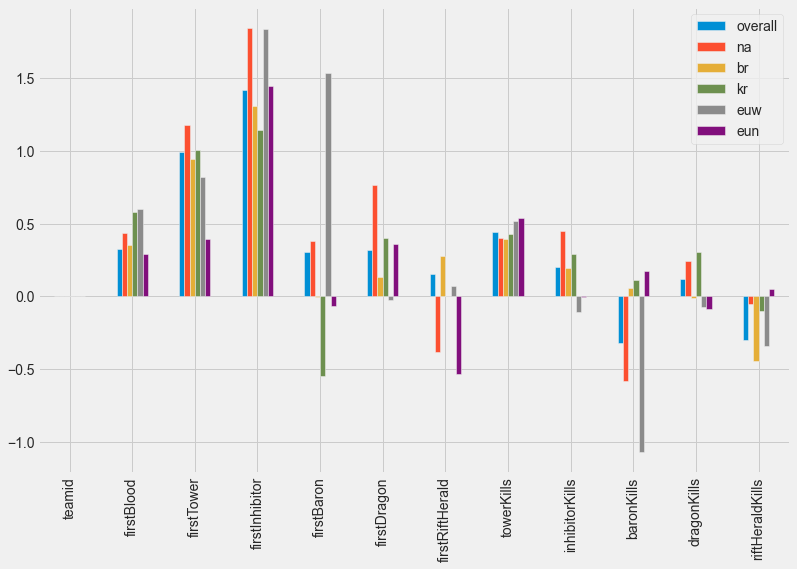

In [61]:
#各地区的权重差异可视化
plt.style.use('fivethirtyeight')
win_conditions.plot(kind = 'bar', figsize = (12, 8))